In [ ]:
# smote, knn, weighted knn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

* Data import

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_valid.shape

(10000, 28, 28)

* Visuailize dataset

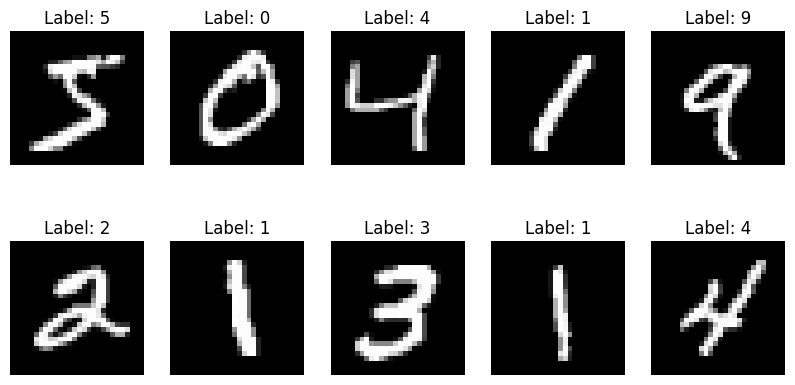

In [5]:
# Visualize a sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


* Visuailizing data columns

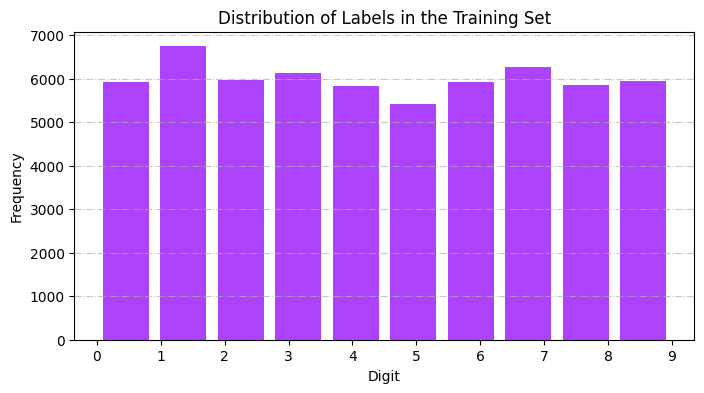

In [6]:
# Visualize the distribution of labels in the training set
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=10, rwidth=0.8, alpha=0.75, color='#9003fc')
plt.xticks(np.arange(0, 10), [str(i) for i in range(10)])
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in the Training Set')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()


* check the class imbalance

In [7]:
# Count the occurrences of each class label in the training set
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)

# Print the class distribution for the training set
print("Training Set Class Distribution:")
for label, count in zip(unique_classes_train, counts_train):
    print(f"{label} : {count}")

Training Set Class Distribution:
0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


mostly the class was the balanced dataset , no need to balanced it.

* compare leave-one-out 2,3,5, and 10 folds cross validation.

In [8]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Flatten the images for logistic regression
x_train = x_train.reshape(x_train.shape[0], -1)

# Initialize the scaler
scaler = StandardScaler()

# Number of folds for cross-validation
k_values = [2, 3, 5, 10, len(x_train)]  # K-fold and LOOCV

for k in k_values:
    if k == len(x_train):
        cv = LeaveOneOut()
    else:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)

    accuracies = []
    for train_index, val_index in cv.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Fit and transform the scaler on the training data
        x_train_fold_scaled = scaler.fit_transform(x_train_fold)
        # Transform the validation data using the same scaler
        x_val_fold_scaled = scaler.transform(x_val_fold)

        model = LogisticRegression(max_iter=1000)
        model.fit(x_train_fold_scaled, y_train_fold)
        y_pred = model.predict(x_val_fold_scaled)
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    print(f"{k}-Fold Cross-Validation Accuracy: {avg_accuracy:.4f}")


2-Fold Cross-Validation Accuracy: 0.9005
3-Fold Cross-Validation Accuracy: 0.9079
5-Fold Cross-Validation Accuracy: 0.9120


* Observe the pattern as the number of folds increases.

* Identify the good value of k for better accuracy.

* Compare the result with and without the class imbalance checking.